# Actividad 10: transformaciones

**About**: Considera el conjunto de datos de tu situación problema hasta la semana 11 ó 13. Recuerda que el archivo se llama: Etiquetas_nutrimentales.xlsx

1. Verifica para cada una de las variables el supuesto de normalidad. Utiliza un método gráfico y uno inferencial. Recuerda las pruebas de hipótesis discutidas en clase; Shapiro (para Python), Anderson-Darling (Minitab® y R).

In [1]:
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import math

In [23]:
""" def setup_data(): """
# import data from csv file into a dataframe
df = pd.read_csv('nutrition-facts-week13.csv')

# get descriptive statistics for the dataframe and their data types
df.describe()
df.dtypes

# replace missing values with NaN
df.replace('NA', np.nan, inplace=True)
    
# rename columns
df.columns = ['Calories', 'Carbohydrates', 'Lipids', 'Protein', 'Sodium']

# fill missing values with string value instead of NaN
df['Lipids'].fillna('No data recorded', inplace=True)
    
display(df)
""" return df
    
original_df = setup_data() """

,Calories,Carbohydrates,Lipids,Protein,Sodium
0,1637,143,No data recorded,47,2182
1,1376,157,No data recorded,79,2000
2,1600,150,No data recorded,61,1630
3,1384,197,No data recorded,52,1721
4,1435,122,No data recorded,60,2669
...,...,...,...,...,...
86,965,138,No data recorded,36,1080
87,879,100,No data recorded,37,2345
88,879,100,No data recorded,37,2345
89,977,149,No data recorded,36,1114


' return df\n    \noriginal_df = setup_data() '

New dataframe without 'Lipids':


,Calories,Carbohydrates,Protein,Sodium
0,1637,143,47,2182
1,1376,157,79,2000
2,1600,150,61,1630
3,1384,197,52,1721
4,1435,122,60,2669
...,...,...,...,...
86,965,138,36,1080
87,879,100,37,2345
88,879,100,37,2345
89,977,149,36,1114


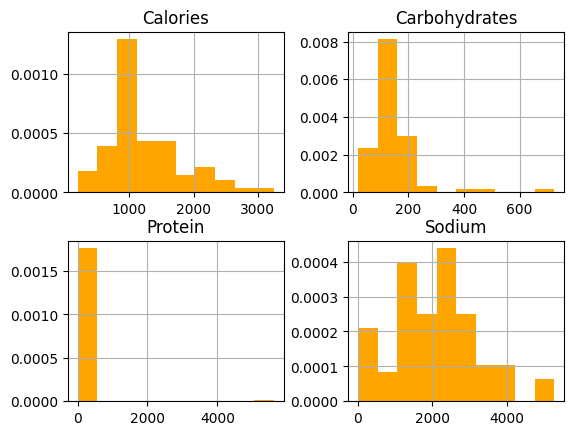

'     return df\n\nnew_df = plot_data(original_df) '

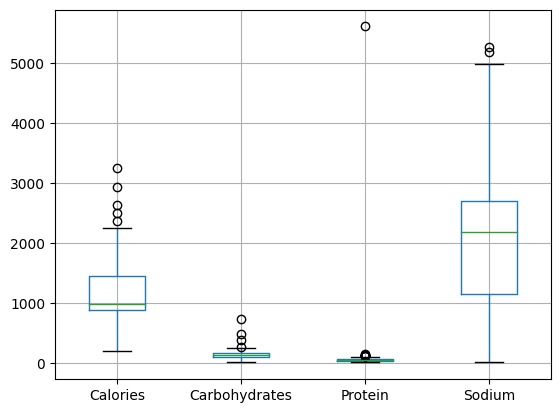

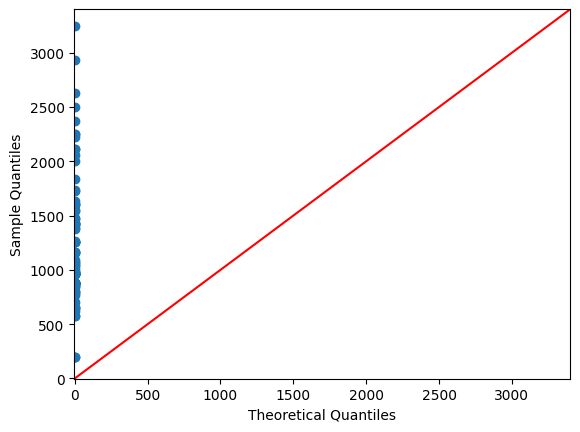

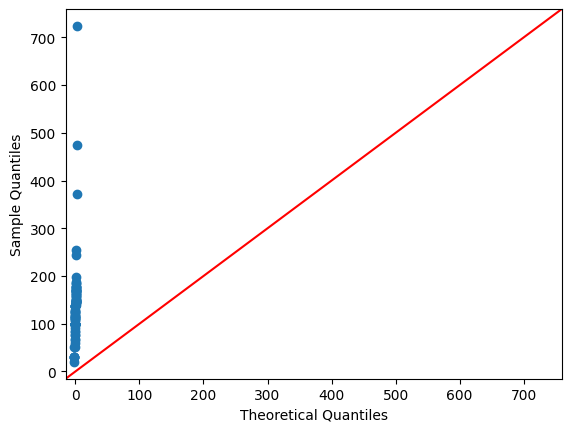

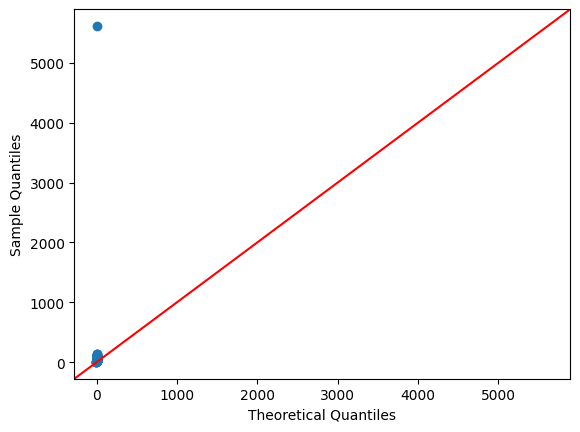

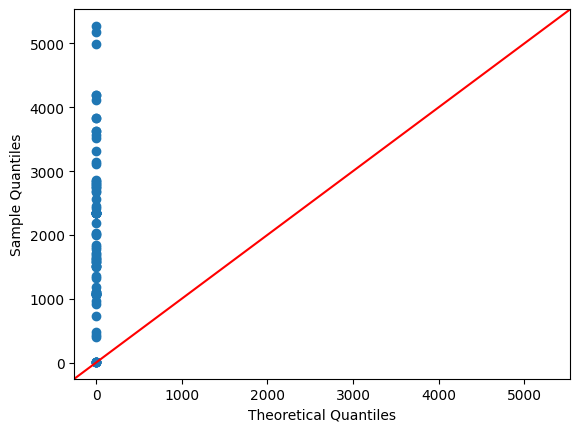

In [24]:
""" # graph method
def plot_data(df): """
"""  # remove 'Lipids' column from dataframe
df = df.drop('Lipids', axis=1) """

new_df = pd.DataFrame(df.drop('Lipids', axis=1))

# let's see the new dataframe without the 'Lipids' column
print("New dataframe without 'Lipids':")
display(new_df)

# plot histograms for each column
new_df.hist(color="orange", density=True)
# by graphing the data, we can see that the data is not normally distributed
plt.show()

# plot boxplots for each column (but it doesn't look like the data is normally distributed either because have outliers)
new_df.boxplot()

# try with a better graph to see the distribution for each column but we can see that it's still not normally distributed
sm.qqplot(new_df['Calories'], line='45')
sm.qqplot(new_df['Carbohydrates'], line='45')
sm.qqplot(new_df['Protein'], line='45')
sm.qqplot(new_df['Sodium'], line='45')

"""     return df

new_df = plot_data(original_df) """

In [25]:
""" # inferential statistics method
def inferential_stats(df): """
phnorm_calories = shapiro(new_df['Calories'])
phnorm_carbs = shapiro(new_df['Carbohydrates'])
phnorm_protein = shapiro(new_df['Protein'])
phnorm_sodium = shapiro(new_df['Sodium'])
    
print(f"Calories: {phnorm_calories}", f"Carbohydrates: {phnorm_carbs}", f"Protein: {phnorm_protein}", f"Sodium: {phnorm_sodium}", sep='\n')

# we can see that the p-value is less than 0.15 (almost 0) so we can reject the null hypothesis and say that the data is not normally distributed
print(f"\nFor calories 'P-value' is greater or equal than 'alpha': {phnorm_calories[1] > 0.15}", f"For carbohydrates 'P-value' is greater or equal than 'alpha': {phnorm_carbs[1] > 0.15}", f"For protein 'P-value' is greater or equal than 'alpha': {phnorm_protein[1] > 0.15}", f"For sodium 'P-value' is greater or equal than 'alpha': {phnorm_sodium[1] > 0.15}", sep='\n')

""" inferential_stats(new_df) """

Calories: ShapiroResult(statistic=0.9097608327865601, pvalue=1.0270160601066891e-05)
Carbohydrates: ShapiroResult(statistic=0.6516859531402588, pvalue=2.249335022712004e-13)
Protein: ShapiroResult(statistic=0.10852795839309692, pvalue=6.178204725016461e-21)
Sodium: ShapiroResult(statistic=0.9671658873558044, pvalue=0.021291179582476616)

For calories 'P-value' is greater or equal than 'alpha': False
For carbohydrates 'P-value' is greater or equal than 'alpha': False
For protein 'P-value' is greater or equal than 'alpha': False
For sodium 'P-value' is greater or equal than 'alpha': False


' inferential_stats(new_df) '

In [ ]:
""" # manual distributed method

# set empty array for each lambda
minus_two = []
minus_one = []
minus_zero_dot_five = []
zero = []
zero_dot_five = []
# one = [prices_rate] # same as original prices_rate data array
two = []

calories = new_df['Calories']    

for i in new_df['Calories']:
        minus_two.append(1/ i ** 2)
        minus_one.append(1/ i)
        minus_zero_dot_five.append(1/ math.sqrt(i))
        zero.append(math.log(i))
        zero_dot_five.append(math.sqrt(i))
        two.append(i**2)
    
print(f"minus_two: {minus_two}\n", f"minus_one: {minus_one}\n", f"minus_zero_dot_five: {minus_zero_dot_five}\n", f"zero: {zero}\n", f"zero_dot_five: {zero_dot_five}\n", f"two: {two}\n") """

In [ ]:
""" phnorm_minus_two = shapiro(minus_two)
phnorm_minus_one = shapiro(minus_one)
phnorm_minus_zero_dot_five = shapiro(minus_zero_dot_five)
phnorm_zero = shapiro(zero)
phnorm_zero_dot_five = shapiro(zero_dot_five)
phnorm_two = shapiro(two)

print(f"minus_two: {phnorm_minus_two}", f"minus_one: {phnorm_minus_one}", f"minus_zero_dot_five: {phnorm_minus_zero_dot_five}", f"zero: {phnorm_zero}", f"zero_dot_five: {phnorm_zero_dot_five}", f"two: {phnorm_two}", sep='\n')

print(f"\nfor phnorm_minus_two 'p-value' is greater or equal than 'alpha': {phnorm_minus_two[1] > 0.15}", f"for phnorm_minus_one 'p-value' is greater or equal than 'alpha': {phnorm_minus_one[1] > 0.15}", f"for phnorm_minus_zero_dot_five 'p-value' is greater or equal than 'alpha': {phnorm_minus_zero_dot_five[1] > 0.15}", f"for phnorm_zero 'p-value' is greater or equal than 'alpha': {phnorm_zero[1] > 0.15}", f"for phnorm_zero_dot_five 'p-value' is greater or equal than 'alpha': {phnorm_zero_dot_five[1] > 0.15}", f"for phnorm_two 'p-value' is greater or equal than 'alpha': {phnorm_two[1] > 0.15}", sep='\n') """

In [ ]:
""" transformed_cal, best_lambda_cal = stats.boxcox(calories)

# Let's see first 15 data transformations
print(transformed_cal[1:15])

# * minus_zero_dot_five is the best lambda because 'p-value' is less or equal than 'alpha' so the data is more normal distributed
print(f"Valor de lambda optimo para usarse en la transformation: {best_lambda_cal}") """

In [ ]:
""" boxcox_calories = ((calories**0.5)-1)/0.5
print(boxcox_calories) """

2. Las que NO satisfagan el supuesto de normalidad con un nivel 𝛼 = 0.15, transfórmalas con el método de Box-Cox, usando el valor óptimo de λ.

transformed_cal:
 [61.33748235 56.51564071 60.68083681 56.67051716 57.64656969 73.02914211
 67.37550677 60.80569754 59.7983413  62.93591817 64.68792791 39.47130256
 49.52422798 76.58540944 37.32733667]
transformed_carbs:
 [ 8.06559708  8.29814197  8.18408942  8.87996687  7.67913532  8.34575172
  8.51430039  8.13387291 12.72361172  8.60252836  8.73039037  5.7848293
  7.01936609  9.57140562  7.16412673]
transformed_protein:
 [3.32098898 3.69666713 3.51152785 3.39533504 3.49956409 4.04283989
 3.88943261 3.78074446 3.56833512 3.61053435 3.69666713 3.07885085
 3.43632851 4.0215164  2.53925261]
transformed_sodium:
 [298.87506217 281.24456227 243.79790314 253.2293557  343.98586094
 399.69494412 385.3544024  360.79923541 335.03424526 360.35889707
 382.61278152 238.12528098 358.06532597 465.73213033   8.86350703]

best_lambda_cal: 0.4544041102963097
best_lambda_carbs: 0.1820858522356897
best_lambda_protein: -0.0787920015106533
best_lambda_sodium: 0.6946526094373355

df_transformed:


,Calories,Carbohydrates,Protein,Sodium
0,61.337482,8.065597,3.320989,298.875062
1,56.515641,8.298142,3.696667,281.244562
2,60.680837,8.184089,3.511528,243.797903
3,56.670517,8.879967,3.395335,253.229356
4,57.646570,7.679135,3.499564,343.985861
...,...,...,...,...
86,47.772754,7.978020,3.122046,182.810669
87,45.697428,7.210769,3.142683,314.286798
88,45.697428,7.210769,3.142683,314.286798
89,48.054183,8.167443,3.122046,186.820875


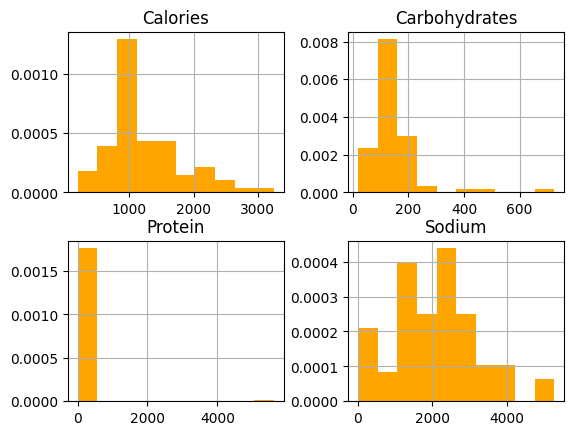

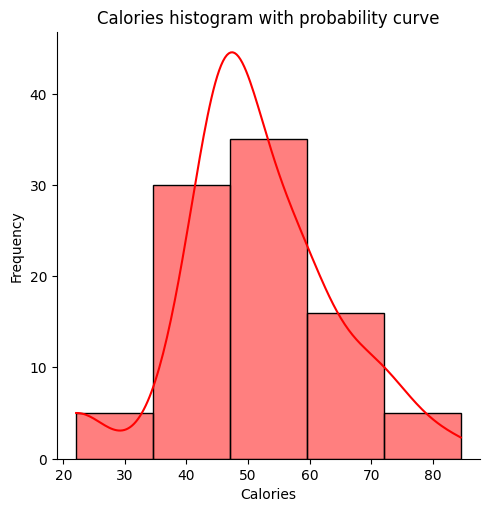

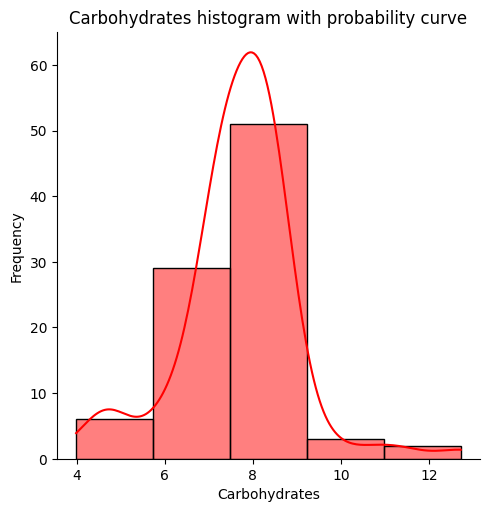

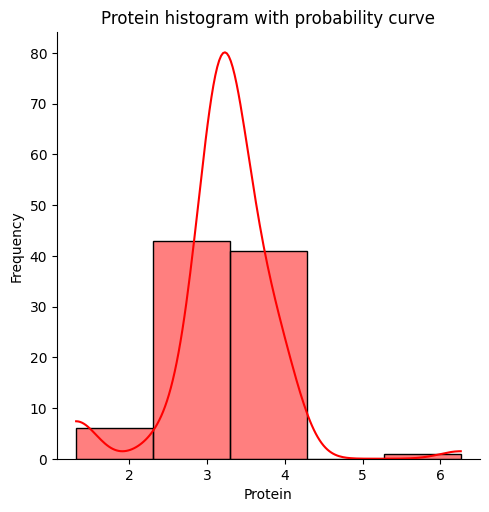

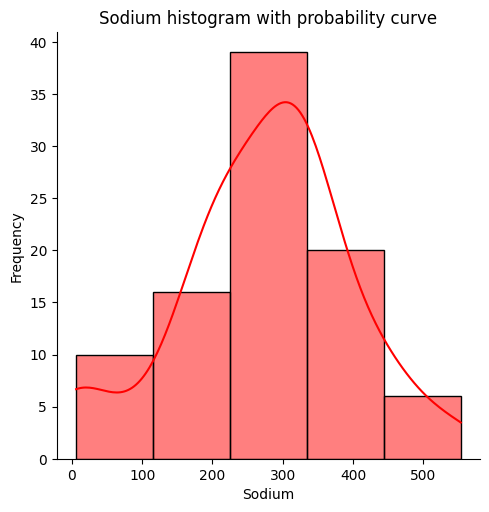

In [26]:
""" def normalize_data(df): """
transformed_cal, best_lambda_cal = stats.boxcox(new_df['Calories'])
transformed_carbs, best_lambda_carbs = stats.boxcox(new_df['Carbohydrates'])
transformed_protein, best_lambda_protein = stats.boxcox(new_df['Protein'])
transformed_sodium, best_lambda_sodium = stats.boxcox(new_df['Sodium'])

print(f"transformed_cal:\n {transformed_cal[0:15]}", f"transformed_carbs:\n {transformed_carbs[0:15]}", f"transformed_protein:\n {transformed_protein[0:15]}", f"transformed_sodium:\n {transformed_sodium[0:15]}", sep='\n')

print(f"\nbest_lambda_cal: {best_lambda_cal}", f"best_lambda_carbs: {best_lambda_carbs}", f"best_lambda_protein: {best_lambda_protein}", f"best_lambda_sodium: {best_lambda_sodium}", sep='\n')

# assign transformed data into the dataframe
df_transformed = pd.DataFrame({'Calories': transformed_cal, 'Carbohydrates': transformed_carbs, 'Protein': transformed_protein, 'Sodium': transformed_sodium})

print("\ndf_transformed:")
display(df_transformed)

""" # * not necessary anymore because we already transformed the data (this is the manual way to do it)

# apply boxcox formula transformation to the data
transformed_cal_form = (new_df['Calories']**best_lambda_cal - 1) / best_lambda_cal  # or 0.5 is so close to best lambda
transformed_carbs_form = (new_df['Carbohydrates']**best_lambda_carbs - 1) / best_lambda_carbs
transformed_protein_form = (new_df['Protein']**best_lambda_protein - 1) / best_lambda_protein
transformed_sodium_form = (new_df['Sodium']**best_lambda_sodium - 1) / best_lambda_sodium

print(f"\nCalories boxcox:\n {transformed_cal_form}", f"Carbohydrates boxcox:\n {transformed_carbs_form}", f"Protein boxcox: {transformed_protein_form}", f"Sodium boxcox:\n {transformed_sodium_form}", sep='\n')

# suggestion when lambda=-0.5
df['Protein'] = 1 / np.sqrt(df['Protein']) """

# plot histograms for each column to verify that the data is now normally distributed
df.hist(color="orange", density=True)
plt.show()

# let's check that the data is now normally distributed
sb.displot(df_transformed["Calories"], color="red", bins=5, kde=True)
plt.title("Calories histogram with probability curve")
plt.ylabel("Frequency")
plt.xlabel("Calories")
plt.show()
sb.displot(df_transformed["Carbohydrates"], color="red", bins=5, kde=True)
plt.title("Carbohydrates histogram with probability curve")
plt.ylabel("Frequency")
plt.xlabel("Carbohydrates")
plt.show()
sb.displot(df_transformed["Protein"], color="red", bins=5, kde=True)
plt.title("Protein histogram with probability curve")
plt.ylabel("Frequency")
plt.xlabel("Protein")
plt.show()
sb.displot(df_transformed["Sodium"], color="red", bins=5, kde=True)
plt.title("Sodium histogram with probability curve")
plt.ylabel("Frequency")
plt.xlabel("Sodium")
plt.show()

""" # now check again the inferential statistics method
inferential_stats(df)

return df """

df_export = df_transformed

3. Guarda las variables transformadas en una nueva hoja de cálculo y ponle el nombre: Matricula_variablestransformadas.xlsx

In [27]:
def export_data(df):
    df_normalized = pd.DataFrame(df)
    # set decimals points to 4 digits
    df_normalized = df_normalized.apply(lambda x: round(x, 4))
    print(df_normalized)

    df_normalized.to_excel('nutrition-facts-week13-normalized.xlsx', index=False)
    df_normalized.to_csv('nutrition-facts-week13-normalized.csv', index=False)

export_data(df_export)

    Calories  Carbohydrates  Protein    Sodium
0    61.3375         8.0656   3.3210  298.8751
1    56.5156         8.2981   3.6967  281.2446
2    60.6808         8.1841   3.5115  243.7979
3    56.6705         8.8800   3.3953  253.2294
4    57.6466         7.6791   3.4996  343.9859
..       ...            ...      ...       ...
86   47.7728         7.9780   3.1220  182.8107
87   45.6974         7.2108   3.1427  314.2868
88   45.6974         7.2108   3.1427  314.2868
89   48.0542         8.1674   3.1220  186.8209
90   71.3063         8.6025   3.9091  426.2521

[91 rows x 4 columns]
